<a href="https://colab.research.google.com/github/Sahithi-03/Linear-Regression-Machine-Learning-Project/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv("/content/Solar Power Plant Data.csv")
data.shape

(8760, 8)

In [4]:
data.isnull().sum()

Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

In [5]:
data.describe()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [10]:
X = data.drop(columns = ['SystemProduction', 'Date-Hour(NMT)'])
X

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity
0,0.6,0,1003.8,-7.4,0.1,97
1,1.7,0,1003.5,-7.4,-0.2,98
2,0.6,0,1003.4,-6.7,-1.2,99
3,2.4,0,1003.3,-7.2,-1.3,99
4,4.0,0,1003.1,-6.3,3.6,67
...,...,...,...,...,...,...
8755,4.1,0,988.2,-4.8,-0.7,94
8756,2.1,0,987.3,-5.0,-0.3,95
8757,1.8,0,986.7,-5.3,0.2,93
8758,2.2,0,986.0,-5.4,0.3,92


In [11]:
Y = data[['SystemProduction']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [14]:
LR.fit(X_train, Y_train)

LinearRegression()

In [16]:
c = LR.intercept_
c

array([7277.53163089])

In [17]:
m=LR.coef_
m

array([[-1.53187358, -8.98070498, -6.40376643,  6.2717715 , 14.20153875,
        -9.492868  ]])

In [19]:
Y_pred_train = LR.predict(X_train)
Y_pred_train

array([[4742.1080813 ],
       [2933.0868592 ],
       [ 507.02393   ],
       ...,
       [4644.18702986],
       [-108.561877  ],
       [ 134.04904478]])

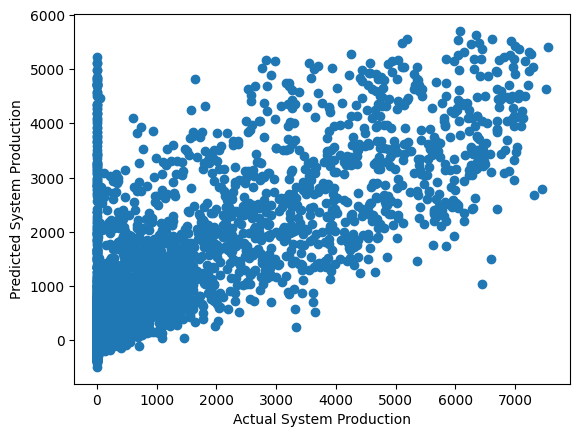

In [21]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, Y_pred_train)
plt.xlabel("Actual System Production")
plt.ylabel("Predicted System Production")
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_train)   #The model is acceptable when near to 1.

0.6352244795665083

In [23]:
Y_pred_test = LR.predict(X_test)

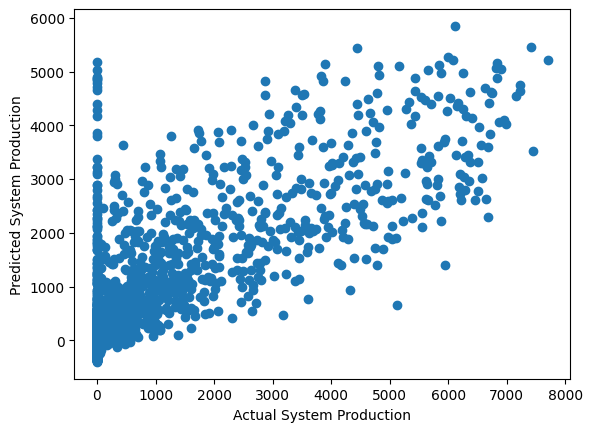

In [24]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred_test)
plt.xlabel("Actual System Production")
plt.ylabel("Predicted System Production")
plt.show()

In [25]:
r2_score(Y_test, Y_pred_test)

0.6371842678873385

**The model is better and can be confirmed by R2 score which is between 0 and 1**

That means our model can predict pretty well for new data but we should check for other factors to make our model more accurate.